In [1]:
!nvidia-smi

Sat May  8 18:16:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Google ドライブをマウントするには、このセルを実行してください。
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


In [3]:
import tensorflow as tf
import numpy as np
import imp
import random
import time
import copy
import gc
import matplotlib.pyplot as plt

from importlib import import_module

In [41]:
%cd /content/drive/My Drive/fxrl/
np.set_printoptions(threshold=np.inf)

agent_name = "dqn"

imp.reload(import_module("rl.network.dqn_network"))
imp.reload(import_module("rl.network." + agent_name + "_network"))
imp.reload(import_module("rl.agent.dqn"))
imp.reload(import_module("rl.agent." + agent_name))
agent = import_module("rl.agent." + agent_name)

agent = agent.Agent(lr=1e-3, dueling=False, noisy=False, restore=False, data_type="1")
# agent = agent.Agent(lr=1e-4, dueling=Fase, noisy= False, gamma=0.6, n=10, restore=False, risk="cvar")
self = agent
gc.collect()

/content/drive/My Drive/fxrl
(120, 1)
  opt = tf.keras.mixed_precision.experimental.LossScaleOptimizer(opt)



5716

In [ ]:
self.x.shape

(9, 230180, 120, 1)

In [5]:
self.model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i (InputLayer)                  [(None, 120, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_540 (Conv1D)             (None, 60, 16)       128         i[0][0]                          
__________________________________________________________________________________________________
average_pooling1d_15 (AveragePo (None, 29, 16)       0           conv1d_540[0][0]                 
__________________________________________________________________________________________________
max_pooling1d_15 (MaxPooling1D) (None, 29, 16)       0           conv1d_540[0][0]                 
____________________________________________________________________________________________

In [ ]:
tf.keras.utils.plot_model(self.model)

In [ ]:
s_ = 0

In [ ]:
self.fast_run_init(S=s_, skip=15)

  opt = tf.keras.mixed_precision.experimental.LossScaleOptimizer(opt)



In [ ]:
b = 512
for i in range(3):
    self.fast_run(10, batch_size = b)
    b *= 2
model = self.model
w = self.model.get_weights()

Epoch 1/10
2621/2621 [==============================] - 481s 172ms/step - loss: 0.6748 - accuracy: 0.6803 - val_loss: 0.5642 - val_accuracy: 0.7122
Epoch 2/10
2621/2621 [==============================] - 444s 170ms/step - loss: 0.5473 - accuracy: 0.7256 - val_loss: 0.5300 - val_accuracy: 0.7400
Epoch 3/10
2621/2621 [==============================] - 442s 169ms/step - loss: 0.5110 - accuracy: 0.7527 - val_loss: 0.4474 - val_accuracy: 0.7959
Epoch 4/10
2621/2621 [==============================] - 443s 169ms/step - loss: 0.4099 - accuracy: 0.8154 - val_loss: 0.3307 - val_accuracy: 0.8585
Epoch 5/10
2621/2621 [==============================] - 441s 168ms/step - loss: 0.2895 - accuracy: 0.8777 - val_loss: 0.2570 - val_accuracy: 0.8932
Epoch 6/10
2621/2621 [==============================] - 441s 168ms/step - loss: 0.2111 - accuracy: 0.9140 - val_loss: 0.1952 - val_accuracy: 0.9215
Epoch 7/10
2621/2621 [==============================] - 440s 168ms/step - loss: 0.1640 - accuracy: 0.9341 - val_

In [ ]:
y = np.argmax(self.model.predict(self.test_x2, batch_size=2048), -1)
print(np.mean(self.test_y2 == y))

0.7106378669290085


In [ ]:
self.change = False
self.reset = 0
self.memory = []
self.rh = np.zeros(self.y.shape[0])
self.rew = []
self.spread = 7
self.account_risk = 0.04
self.init_bach_size = 2048
self.bach_size = self.init_bach_size

gc.collect()

self.model = model
self.model.set_weights(w)

self.step(2, S=s_, skip=15)
r = self.exp[0]
self.rew = [r]
self.best = self.total_account_size
self.best2 = r
self.best_pip = self.total_pip
self.best_weight = self.model.get_weights()
self.w = self.best_weight
self.best3 = self.best
self.best_w = self.best_weight
self.best_model.set_weights(self.best_weight)

# self.lr = 1e-3
# self.compile()

print(f"growth rate = {self.total_account_size  / self.account_size}",
      f"total pip = {self.total_pip}")

growth rate = 382.15014 total pip = 40914.0


In [ ]:
%cd /content

self.run(adjust=True, S=s_)

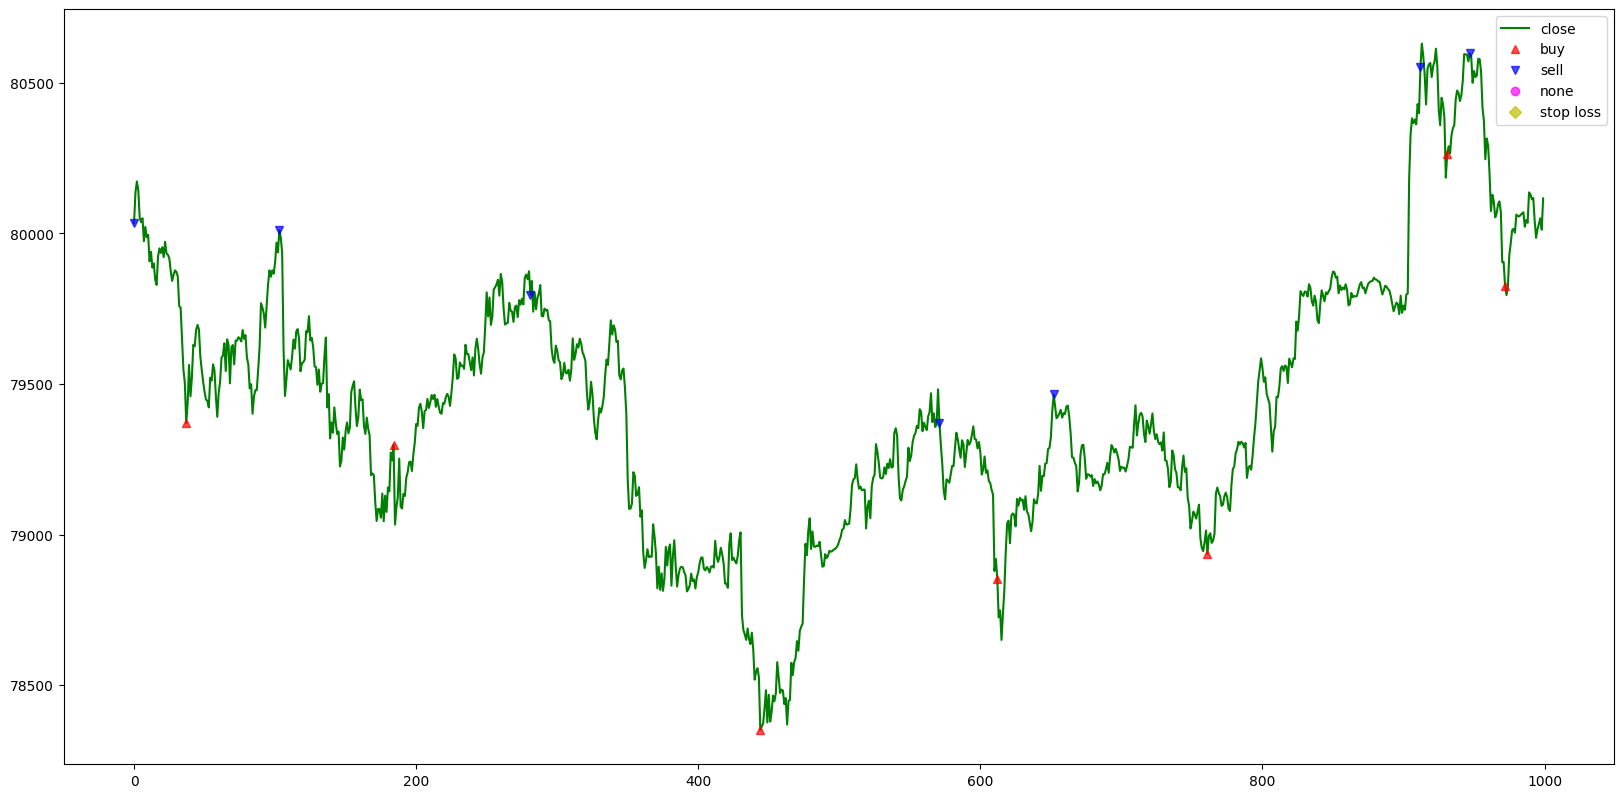

pip = 9559.0
initial account size = 100000
account size = 257395.0
accuracy = 1.0


In [46]:
self.plot(types=1, S=1, skip=15)

In [ ]:
self.model.set_weights(self.w)
# self.model.set_weights(self.best_model.get_weights())

In [34]:
# np.random.seed(0)
# self.account_risk = 0.05
pip = 0
accoutn_size = self.account_size
for s in range(self.y.shape[0]):
  self.step(2, S=s, skip=15)

  print(self.total_account_size, self.total_pip, np.mean(np.array(self.pip) > 0))
  pip += self.total_pip
  accoutn_size += self.total_account_size - self.account_size

  # print(np.round(self.qs[-10:], 2))#.astype(int)
  print(self.exp)
print(pip, accoutn_size)

287875510.0 60286.0 0.48561872909698994
[-2713.927, 0.3330888032743275, 0.156, 1.656, 0.486, 2.145, 2878.755, -2713.927]
28572631420.0 355073.0 0.9601990049751243
[-1327.5, 3.567851226071109, 1.324, 90.642, 0.96, 95.534, 285726.314, -1327.5]
19938013020.0 258613.0 0.7363636363636363
[-2541.99, 2.3321927298813865, 0.609, 9.895, 0.736, 12.836, 199380.13, -2541.99]
35708539740.0 478626.0 0.740072202166065
[-2508.93, 2.332213478353083, 0.641, 10.066, 0.74, 13.039, 357085.397, -2508.93]
15045539944.0 212415.0 0.7150537634408602
[-2085.748, 1.8117345513844905, 0.615, 7.393, 0.715, 9.82, 150455.399, -2085.748]
28496149577.0 382977.0 0.7109826589595376
[-3319.293, 2.1672096459967833, 0.609, 8.602, 0.711, 11.378, 284961.496, -3319.293]
15899534779.0 200756.0 0.7560646900269542
[-1884.033, 2.0430195332362824, 0.659, 9.427, 0.756, 12.129, 158995.348, -1884.033]
19557465012.0 254506.0 0.762982689747004
[-1858.506, 2.5323823024587866, 0.699, 11.817, 0.763, 15.048, 195574.65, -1858.506]
22862062339.

In [47]:
types = 3
s = 0
skip = 15

In [61]:
        self.exp = []
        h = 0
        
        
        pips = []
        
        total_account_size = self.account_size# * 100

        if types == 2:
            h = self.test_step[0]
            h_ = self.test_step[-1]
        elif types == 1:
            h = 0
            # h_ = self.test_step[0]
            h_ = self.x.shape[1]
        elif types == 3:
            h = self.test_step[-1]
            h_ = self.x.shape[1]
            # h = self.test_step[0] - 2500
            # h_ = self.test_step[0]
        elif types == 4:
            h = self.test_step[0]# - 20000
            # h_ = self.test_step[0] + 1000
            # h_ = self.test_step[0]
            h_ = self.x.shape[1]

        # s = 3
        for s in [s]:
        # for s in range(self.y.shape[0]):
            self.pip = []
            pip_h = []
            pip_h2 = []
            total_pip = 0
            account_h = [self.account_size]
            growth = []
            draw_down = []
            account_size = self.account_size * 1
            df = self.x[s, h:h_].copy()
            trend = self.y[s, h:h_].copy()
            high = self.high[s, h:h_]
            low = self.low[s, h:h_]
            atr = self.atr[s, h:h_]
            step_size = len(trend)

            actions = self.action_select(df, step_size)

            old_a = self.action_list[actions[0]]
            actions[0:skip] = actions[0]
            old_i = 0
            old_pip = 0
            stop_loss_i = 0
            end = False

            loss_cut = -atr[0] * 2
            max_losscut = -np.quantile(atr, 0.3) * 2
            position_size = int((account_size * self.account_risk) / -loss_cut)

            old_a_size = account_size
            g = []
            for i in range(step_size - 1):
                
                if (i + 1) % 480 == 0:
                    print(account_size, account_size / old_a_size)
                    g.append(account_size / old_a_size)
                    old_a_size = account_size

                a = self.action_list[actions[i]]

                if old_a != a:
                    actions[i:i+skip] = actions[i]
                    if end == False:
                        if old_a != 0:
                            pip = (trend[i] - trend[old_i]) * old_a
                            account_size += (pip * position_size - 7 * position_size) 
                            pip -= 7
                            total_pip += pip

                            growth.append(np.log(account_size / account_h[-1]) * 100)
                            account_h.append(account_size)            
                            self.pip.append(pip)               
                            pip_h.append(sum(self.pip))
                            pip_h2.append(total_pip)
                            if pip < 0:
                              draw_down.append(total_pip - np.max(pip_h))
                            # if account_size <= 0:
                            #     break

                    old_pip = 0
                    old_i = i
                    end = False
                    loss_cut = -atr[i] * 2
                    # loss_cut = np.clip(loss_cut, max_losscut, max_losscut)
                    # print(loss_cut)
                    position_size = int((account_size * 0.03) / -loss_cut) * 1
                    position_size = np.minimum(position_size, 1000 * 100)
                    position_size = np.maximum(position_size, 1)
                    loss_cut *= 5
                    # # loss_cut = np.maximum(loss_cut, max_losscut)

                old_a = a
                # if end == False:
                #     pip = low[i + 1] - trend[old_i] if a == 1 else trend[old_i] - high[i + 1]

                #     end = pip <= loss_cut
                #     if end:
                #         old_pip = 0
                #         # old_i = i + 1
                # #
                #         pip = loss_cut
                # #         # print(pip, i + 1 - old_i)
                #         account_size += (pip * position_size - 7 * position_size)
                #         # print(account_size / account_h[-1], len(account_h))
                #         pip -= 7
                #         total_pip += pip
                #         pip_h2.append(total_pip)
                #         growth.append(np.log(account_size / account_h[-1]))
                #         account_h.append(account_size)
                #         pip_h.append(sum(self.pip))
                #         self.pip.append(pip)
                #         # if account_size <= 0:
                #             # break

            if np.sum(self.pip) > 1000:
                total_account_size += account_size - self.account_size
                pips.append(self.pip)
            print(s, int(account_size), int(total_pip))
        self.pip = np.array(self.pip)
        pips = np.array(self.pip)
        # r = np.sum(self.pip[self.pip > 0]) / np.sum(np.abs(self.pip[self.pip < 0]))
        # if np.isnan(r):
        #     r = 0
        self.r = total_account_size
        self.total_pip = np.sum(self.pip)

236488.0 2.36488
381294.0 1.6123185954467034
408065.0 1.0702109133634414
537092.0 1.3161922732897946
547202.0 1.01882359074423
500523.0 0.9146951217283562
639413.0 1.2774897457259706
563014.0 0.8805169741622394
536162.0 0.9523066921959312
616793.0 1.1503855178099156
586272.0 0.9505166238916459
531567.0 0.9066900687735385
647197.0 1.217526671143995
569124.0 0.8793674877973785
683982.0 1.2018154215952939
827124.0 1.2092774371255384
525499.0 0.6353327916974963
442040.0 0.8411814294603795
530874.0 1.2009637136910687
533135.0 1.00425901438006
728513.0 1.366470031042794
888449.0 1.2195376060550738
619005.0 0.6967254169907333
1354940.0 2.1888999281104353
1394123.0 1.0289186237028947
1453366.0 1.0424948157372054
1614526.0 1.1108874158333137
1481568.0 0.9176488950936683
1704354.0 1.150371768288732
1510890.0 0.8864883703737604
2077344.0 1.374914123463654
2759586.0 1.3284203290355376
2178273.0 0.7893477499885853
2103793.0 0.9658077752421299
2747218.0 1.3058404510329675
4770504.0 1.736485419067580

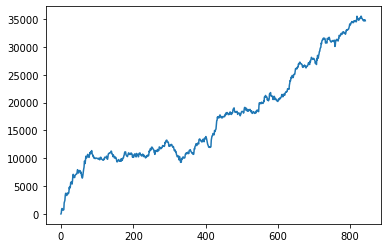

In [59]:
plt.plot(pip_h[:])

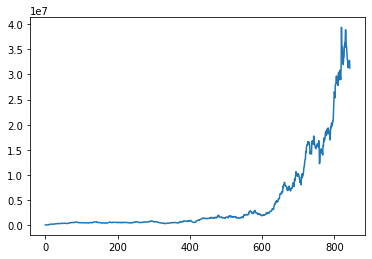

In [60]:
plt.plot(account_h[:])

In [63]:
a = self.account_size
for i in g[7:]:
    a *= i
    print(a)


88051.69741622393
83852.22070868124
96462.38033946759
91689.09609282261
83133.59284218492
101217.36655338565
89007.26134751715
106970.29932140883
129356.76941194499
82184.59743546031
69132.15715038635
83025.21218680256
83378.81775941368
113934.65569201748
138947.59724935208
96808.3226334153
211903.7304527746
218031.694694978
227296.91138591172
252501.27851638917
231707.51924030314
266549.7886342629
236293.28774985802
324882.978606941
431581.1533390781
340667.6123256799
329019.4287573133
429646.8792470593
746075.5411604079
1044354.1185431011
1099198.170822301
1535757.4838171883
1532844.9687447702
2601180.144914163
2491393.825274118
2379867.628590598
2852786.070974472
3240996.0385541115
4586499.179716397
5231280.095963017
4889394.804297067
